In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

salary_df=pd.read_csv('real_estate_data.csv')

In [5]:
year = salary_df['year']
bed = salary_df['bed']
bath = salary_df['bath']
sqft = salary_df['sqft']

Regression with year

coefficients 	 [979.45641452]
intercept 	 -1660782.51203517
R^2 value 	 0.020152832542723265
residuals 
 0      -20093.147588
1        4543.703562
2      -76219.445288
3      -30442.706801
4     -144959.014366
           ...      
495   -117494.665682
496     60080.554712
497    -62130.316998
498    -65519.445288
499     44257.293199
Name: price, Length: 500, dtype: float64


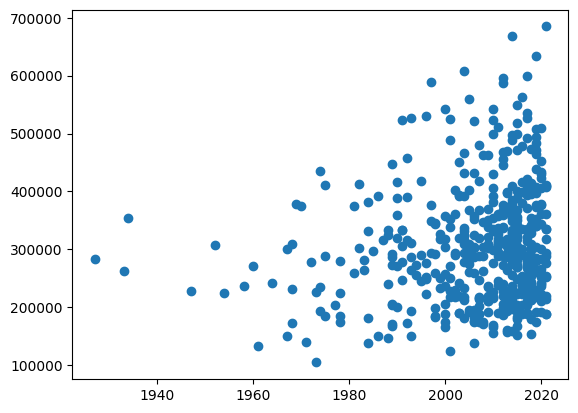

In [6]:
X = np.array([year]).T
price = salary_df['price']

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

plt.scatter(year, price)

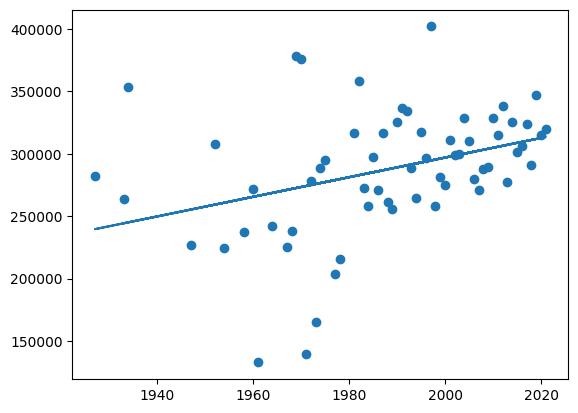

In [7]:
years = year.unique()
avg = []
for x in years:
  temp = salary_df[salary_df['year']==x]
  temp = temp['price']
  len = temp.size
  sum = temp.sum()
  temp_avg = sum / len
  avg.append(temp_avg)
data = np.array([years, avg]).T
myFrame = pd.DataFrame(data, columns=['year', 'price'])

regression = np.polyfit(years, avg, 1)
model = np.poly1d(regression)

res = avg-model(years)
plt.scatter(years, avg)
plt.plot(years, model(years))

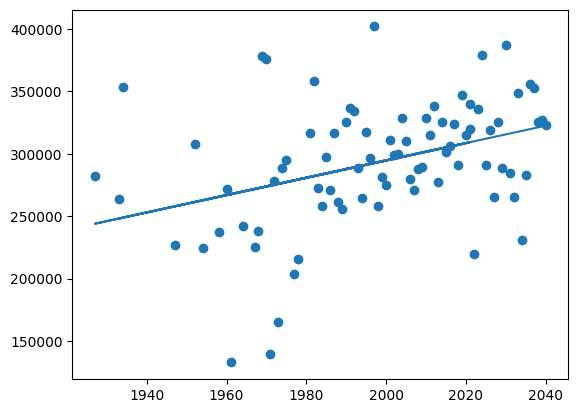

In [8]:
# generating data for the future
max= 2021
dev = np.std(res)
Y_temp = []
price_temp = []
for i in range(20):
  year = max + i
  price_pred = model(year)
  bias = np.random.randn()
  price_bias = price_pred+bias*dev
  Y_temp.append(year)
  price_temp.append(price_bias)

years = np.append(years, Y_temp)
avg = np.append(avg, price_temp)

regression = np.polyfit(years, avg, 1)
model = np.poly1d(regression)

res = avg-model(years)
plt.scatter(years, avg)
plt.plot(years, model(years))

Regression with bed

In [9]:
X = np.array([bed]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [103525.72153251]
intercept 	 1137.0359097582987
R^2 value 	 0.7933732361194773
residuals 
 0     -74814.200507
1     -19814.200507
2      33311.521025
3     -30314.200507
4     -70688.478975
           ...     
495   -35388.478975
496    66085.799493
497   -75714.200507
498    44011.521025
499    44385.799493
Name: price, Length: 500, dtype: float64


Regression with bath

In [10]:
X = np.array([bath]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [170380.05206356]
intercept 	 33733.497271009604
R^2 value 	 0.6270283029800351
residuals 
 0      -52403.575366
1        2596.424634
2       37386.450665
3       -7903.575366
4     -151803.575366
           ...      
495   -116503.575366
496     88496.424634
497    -53303.575366
498    -37103.575366
499     66796.424634
Name: price, Length: 500, dtype: float64


Regression with sqft

In [11]:
X = np.array([sqft]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [104.32339894]
intercept 	 13256.977723349759
R^2 value 	 0.8997967727565468
residuals 
 0     -100802.748435
1      -46845.982425
2       18552.990402
3       -8313.984922
4      -35371.778106
           ...      
495    -14677.053958
496     36967.549597
497    -16157.561302
498     25080.054444
499     21526.953533
Name: price, Length: 500, dtype: float64


Regression with parameters

In [12]:
X = np.array([year, bed, bath, sqft]).T
price = salary_df['price']

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

<ipython-input-12-894bc4cffbc5>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([year, bed, bath, sqft]).T


ValueError: ignored

In [13]:
years_dict = {}
price_ft = {}


for x in salary_df['year']:
  a = salary_df[salary_df['year']==x]
  beds = a['bed'].unique()
  temp_bed = []
  temp_price = []
  for bed in beds:
    filtered = a[a['bed']==bed]
    sum_price = filtered['price'].sum()
    sum_feet = filtered['sqft'].sum()
    cur_price = sum_price / sum_feet
    temp_bed.append(bed)
    temp_price.append(cur_price)
  prices = dict(zip(temp_bed, temp_price))
  years_dict[x] = prices




In [14]:
deux = []
trois = []
quatro = []
cinq = []
year = []


for i in sorted(years_dict.keys()):
  year.append(i)
  value = years_dict[i]
  try:
    price = value[2]
    deux.append(price)
  except Exception:
    deux.append(np.nan)
  try:
    price = value[3]
    trois.append(price)
  except Exception:
    trois.append(np.nan)
  try:
    price = value[4]
    quatro.append(price)
  except Exception:
    quatro.append(np.nan)
  try:
    price = value[5]
    cinq.append(price)
  except Exception:
    cinq.append(np.nan)


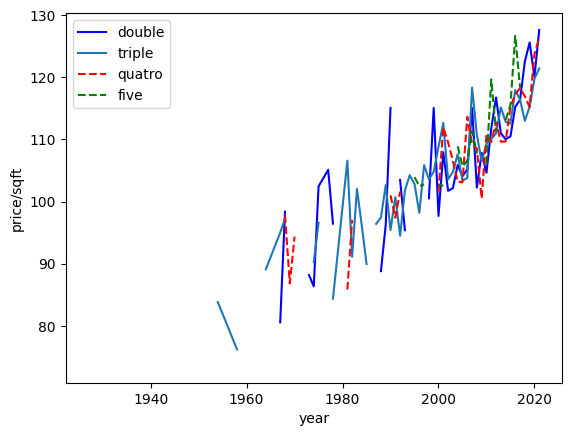

In [15]:
plt.plot(year, deux, c='blue')
plt.plot(year, trois)
plt.plot(year, quatro, '--', c='red', )
plt.plot(year, cinq, '--', c='green')
plt.ylabel("price/sqft")
plt.xlabel("year")
plt.legend(['double', 'triple', 'quatro', 'five'])
plt.show()


In [26]:
baths_dict = {}

for x in salary_df['year']:
  a = salary_df[salary_df['year']==x]
  baths = a['bath'].unique()
  temp_bath = []
  temp_price = []
  for bath in baths:
    filtered = a[a['bath']==bath]
    sum_price = filtered['price'].sum()
    counter = filtered.shape[0]
    cur_price = sum_price / counter
    temp_bath.append(bath)
    temp_price.append(cur_price)
  prices = dict(zip(temp_bath, temp_price))
  baths_dict[x] = prices


In [ ]:
baths_dict

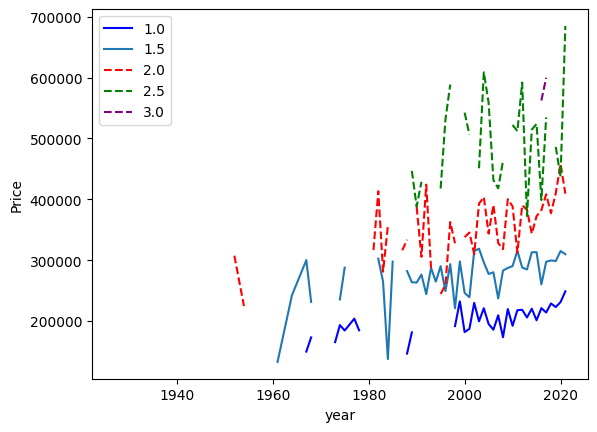

In [28]:
odin = []
dva = []
tri = []
chet = []
piat = []
year_1 = []


for i in sorted(baths_dict.keys()):
  year_1.append(i)
  value = baths_dict[i]
  try:
    price = value[1.0]
    odin.append(price)
  except Exception:
    odin.append(np.nan)
  try:
    price = value[1.5]
    dva.append(price)
  except Exception:
    dva.append(np.nan)
  try:
    price = value[2.0]
    tri.append(price)
  except Exception:
    tri.append(np.nan)
  try:
    price = value[2.5]
    chet.append(price)
  except Exception:
    chet.append(np.nan)
  try:
    price = value[3.0]
    piat.append(price)
  except Exception:
    piat.append(np.nan)


plt.plot(year_1, odin, c='blue')
plt.plot(year_1, dva)
plt.plot(year_1, tri, '--', c='red', )
plt.plot(year_1, chet, '--', c='green')
plt.plot(year_1, piat, '--', c='purple')
plt.ylabel("Price")
plt.xlabel("year")
plt.legend(['1.0', '1.5', '2.0', '2.5', '3.0'])
plt.show()


62
62
62
62
62


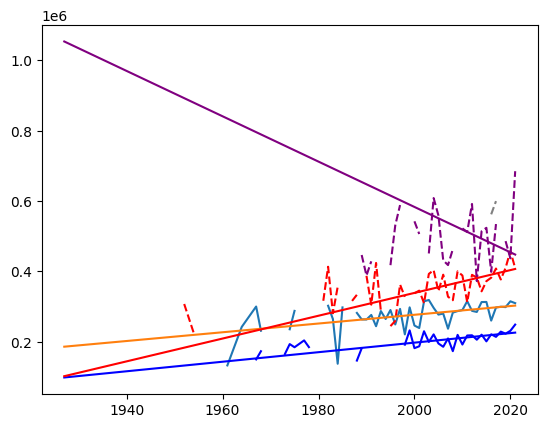

In [55]:
Y = np.array(year_1)

def myRegression(data):
  print(Y.shape[0])
  longest = 0
  index = 0
  cur_longest = 0
  cur_index = 0
  counting = False
  for i in range(Y.shape[0]):
    if data[i]>0:
      if counting == False:
        cur_index = i
      cur_longest += 1
      counting = True
      if i == Y.shape[0]-1:
        if cur_longest > longest:
          index = cur_index
          longest = cur_longest
    else:
      if counting == True:
        counting = False
        if cur_longest > longest:
          index = cur_index
          longest = cur_longest
        cur_longest = 0
        cur_index = 0
  years = year_1[index:index+longest]
  p = data[index: index+longest]
  regression = np.polyfit(years, p, 1)
  model = np.poly1d(regression)
  return model


model1 = myRegression(odin)
model2 = myRegression(dva)
model3 = myRegression(tri)
model4 = myRegression(chet)
model5 = myRegression(piat)
plt.plot(year_1, odin, c='blue')
plt.plot(year_1, dva)
plt.plot(year_1, tri, '--', c='red')
plt.plot(year_1, chet, '--', c='purple')
plt.plot(year_1, piat, '--', c='grey')
plt.plot(year_1, model1(year_1), c='blue')
plt.plot(year_1, model2(year_1))
plt.plot(year_1, model3(year_1), c='red')
plt.plot(year_1, model4(year_1), c='purple')
plt.plot(year_1, model5(year_1), c='grey')

whats the proportion of each bed size apartment volume in the market

do the avg price of each apartment size (corelation between price and each size)

bath for me - how bath affects the price of each ap-size
do the propertion of bath.size

what's the price of sqft in each apartment size
